<h2> Importing Libraries </h2>

In [1]:
import numpy as np
import pandas as pd
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt


<h2> Data collection and Preprocessing </h2>

In [2]:
featureSet = pd.read_csv('exercise.csv')
targetSet = pd.read_csv('calories.csv')

In [3]:
featureSet.shape

(15000, 8)

In [4]:
featureSet.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [5]:
featureSet.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
dtype: int64

In [6]:
featureSet['Gender'].value_counts()

Gender
female    7553
male      7447
Name: count, dtype: int64

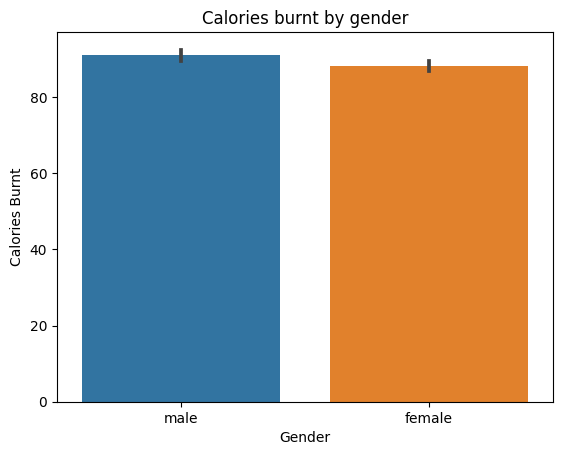

In [7]:
calBurnt = targetSet['Calories']
gender = featureSet['Gender']
sns.barplot(x=gender, y=calBurnt)
plt.xlabel('Gender')
plt.ylabel('Calories Burnt')
plt.title('Calories burnt by gender')
plt.show()

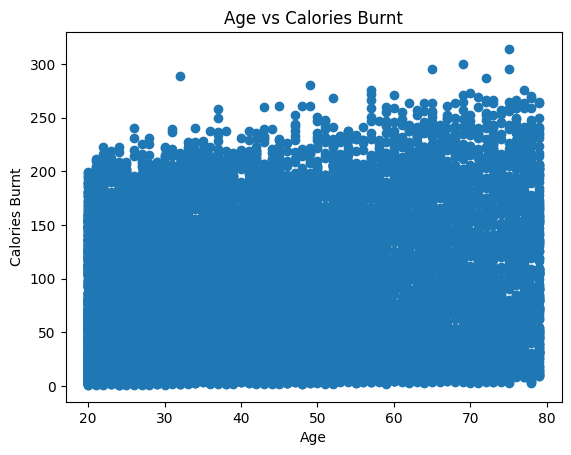

In [8]:
age = featureSet['Age']
plt.scatter(age, calBurnt)
plt.xlabel('Age')
plt.ylabel('Calories Burnt')
plt.title('Age vs Calories Burnt')
plt.show()

<h4> Feature Engineering </h4>

In [9]:
bmi = featureSet['Weight']/((featureSet['Height']/100)**2)
newFeature = pd.Series(bmi, name='BMI')
newTargetSet = pd.concat([featureSet, newFeature], axis=1)

In [10]:
newTargetSet.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,BMI
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,26.038781
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,21.773842
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,24.655910
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,22.159109
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,24.456063


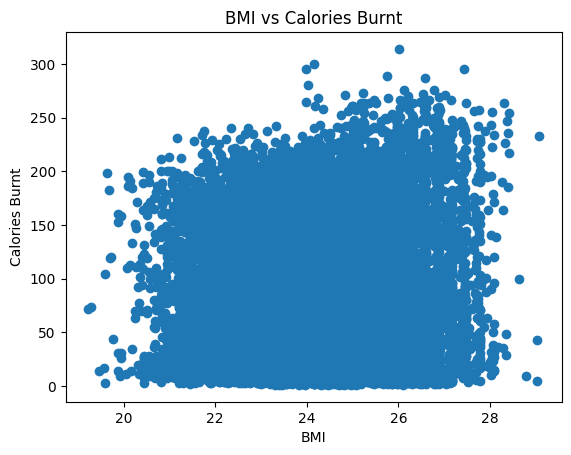

In [11]:
BMIn = newTargetSet['BMI']
plt.scatter(BMIn, calBurnt)
plt.xlabel('BMI')
plt.ylabel('Calories Burnt')
plt.title('BMI vs Calories Burnt')
plt.show()

<h4> Dropping Columns and splitting X and y </h4>

In [12]:
X = newTargetSet.drop(columns=['User_ID', 'Gender', 'Age', 'Height', 'Weight'], axis=1)
y = targetSet['Calories']
print(X)
print(y)

       Duration  Heart_Rate  Body_Temp        BMI
0          29.0       105.0       40.8  26.038781
1          14.0        94.0       40.3  21.773842
2           5.0        88.0       38.7  24.655910
3          13.0       100.0       40.5  22.159109
4          10.0        81.0       39.8  24.456063
...         ...         ...        ...        ...
14995      11.0        92.0       40.4  23.087868
14996       6.0        85.0       39.2  23.875115
14997      16.0        90.0       40.1  22.942130
14998       2.0        84.0       38.3  26.040968
14999      18.0        92.0       40.5  26.395803

[15000 rows x 4 columns]
0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999     98.0
Name: Calories, Length: 15000, dtype: float64


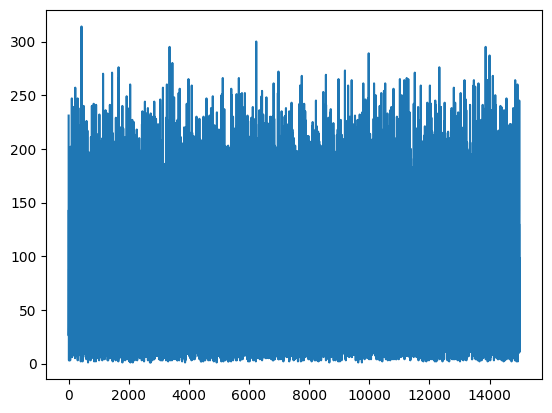

In [13]:
plt.plot(y)


<h4> Standardistaion </h4>

In [14]:
scalar = StandardScaler()
scalar.fit(X)
X = scalar.transform(X)

In [15]:
print(X)

[[ 1.61912727  0.98940395  0.99402302  1.08670497]
 [-0.1839901  -0.15846102  0.3523425  -1.64945465]
 [-1.26586052 -0.78456918 -1.70103518  0.19952758]
 ...
 [ 0.05642555 -0.57586646  0.09567029 -0.89994267]
 [-1.62648399 -1.20197462 -2.21437961  1.08810763]
 [ 0.2968412  -0.36716374  0.60901471  1.31575159]]


<h4> Train Test Split </h4>

In [16]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
print(X.shape, Xtrain.shape, Xtest.shape)

(15000, 4) (12000, 4) (3000, 4)


<h2> Model Training </h2>

In [18]:
model = XGBRegressor()

<h4> Hyperparameter Tuning </h4>

In [19]:
params = {
    "learning_rate" : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30, 0.35, 0.4, 0.45, 0.5],
    "max_depth" : [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
    "min_child_weight" : [1, 3, 5, 7, 9, 11, 13],
    "gamma" : [0.0, 0.1, 0.2, 0.3, 0.4, 0.5],
    "colsample_bytree" : [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
}

randomSearch = RandomizedSearchCV(model, param_distributions=params, n_iter=10, scoring='neg_mean_squared_error', n_jobs=-1, cv=10, verbose=3)

randomSearch.fit(Xtrain, ytrain)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[CV 3/10] END colsample_bytree=0.4, gamma=0.5, learning_rate=0.1, max_depth=11, min_child_weight=7;, score=-157.108 total time=   0.3s
[CV 4/10] END colsample_bytree=0.4, gamma=0.5, learning_rate=0.1, max_depth=11, min_child_weight=7;, score=-159.643 total time=   0.3s
[CV 2/10] END colsample_bytree=0.4, gamma=0.5, learning_rate=0.1, max_depth=11, min_child_weight=7;, score=-177.354 total time=   0.3s
[CV 1/10] END colsample_bytree=0.4, gamma=0.5, learning_rate=0.1, max_depth=11, min_child_weight=7;, score=-164.224 total time=   0.3s
[CV 5/10] END colsample_bytree=0.4, gamma=0.5, learning_rate=0.1, max_depth=11, min_child_weight=7;, score=-195.930 total time=   0.3s
[CV 6/10] END colsample_bytree=0.4, gamma=0.5, learning_rate=0.1, max_depth=11, min_child_weight=7;, score=-153.326 total time=   0.3s
[CV 9/10] END colsample_bytree=0.4, gamma=0.5, learning_rate=0.1, max_depth=11, min_child_weight=7;, score=-170.391 total time=   0.3s
[CV 8/10] END colsample_bytree=0.4, gamma=0.5, learning

RandomizedSearchCV(cv=10,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate...
                                          num_parallel_tree=None,
                                          predictor=None, random_state=None, ...),
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5, 0.6,
                                                             0.7, 0.8],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3, 0.35, 0.4,
                                                          0.45, 0.5],
                                        'max_depth': [3, 4, 5, 6, 7, 8, 9, 10,
                                                      11, 12, 13, 14, 15],
                                        'min_child_weight': [1, 3, 5, 7, 9, 11,
                                                             13]},
                   scoring='neg_mean_squared_error', verbose=3)

In [20]:
randomSearch.best_estimator_

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.5, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.3, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=9, max_leaves=None,
             min_child_weight=13, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [21]:
randomSearch.best_params_

{'min_child_weight': 13,
 'max_depth': 9,
 'learning_rate': 0.1,
 'gamma': 0.3,
 'colsample_bytree': 0.5}

In [29]:
model = XGBRegressor(colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=9, min_child_weight=13, n_estimators=100)

In [30]:
model.fit(Xtrain, ytrain)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.5, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.1, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=9, max_leaves=None,
             min_child_weight=13, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

<h2> Model Evaluation </h2>

<h4> Training Set </h4> 

In [31]:
trainPrediction = model.predict(Xtrain)

In [32]:
trainMSE = metrics.mean_squared_error(ytrain, trainPrediction)
print("Train MSE: ", trainMSE)
trainMAE = metrics.mean_absolute_error(ytrain, trainPrediction)
print("Train MAE: ", trainMAE)
trainRscore = metrics.r2_score(ytrain, trainPrediction)
print("Train R2 Score: ", trainRscore)

Train MSE:  89.67899069011753
Train MAE:  6.612401399264733
Train R2 Score:  0.9768021589193033


<h4> Test Set </h4>

In [33]:
testPrediction = model.predict(Xtest)
testMSE = metrics.mean_squared_error(ytest, testPrediction)
print("Test MSE: ", testMSE)
testMAE = metrics.mean_absolute_error(ytest, testPrediction)
print("Test MAE: ", testMAE)
testRscore = metrics.r2_score(ytest, testPrediction)
print("Test R2 Score: ", testRscore)

Test MSE:  131.515177159168
Test MAE:  7.915620432694753
Test R2 Score:  0.9674127917911985


<h2> Predictions </h2>

In [34]:
input = (197.0,102.0,8.0,75.0,39.6) #removed gender userID and age
npInput = np.asarray(input)
ibmi = npInput[1]/((npInput[0]/100)**2)
npInput = np.delete(npInput, [0,1])
npInput = np.append(npInput, ibmi)
stdInput = scalar.transform(np.reshape(npInput, (1, -1)))

p = model.predict(stdInput)

print("Calories burnt: ", p)

Calories burnt:  [23.642744]


/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
